In [22]:
import pickle
import os.path

import numpy as np
import qutip
import matplotlib.pyplot as plt
import matplotlib


import scipy.constants as sc
import scipy as sp


In [31]:
fname = 'sim_tweezer_LiHFS_1064'
f = os.path.join(os.path.realpath('.'), 'Output', fname)

with open(f, 'rb') as filein:
    data = pickle.load(filein)

with open(f + '_SIMPARAMS', 'rb') as filein:
    sim_params = pickle.load(filein)

In [32]:
# compute <n> averaged over all HFS states.
avg_nvt = np.zeros_like(data['times'])
avg_pns = np.zeros_like(data['probabilities']['S12 1'][0])
        
for i, (state, nvt) in enumerate(data['occupation'].items()):
    pns = data['probabilities'][state]    

    avg_nvt += nvt
    avg_pns += pns[-1]
    
    print(f'State {state}:')
    print(f'\tFinal occupation number: {nvt[-1]:.3f}')
    print(f'\tFinal cooling fraction: {100 - nvt[-1]/nvt[0]*100:.3f}%')
    print(f'\tFinal ground state occupation probability: {pns[-1][0]*100:.3f}%')
    

avg_nvt /= (i+1)
avg_pns /= (i+1)

print()
print(f'Final occupation number: {avg_nvt[-1]:.3f}')
print(f'Final cooling fraction: {100 - avg_nvt[-1]/avg_nvt[0]*100:.3f}%')
print(f'Final ground state occupation probability: {avg_pns[0]*100:.3f}%')
    

State S12 1:
	Final occupation number: 0.393
	Final cooling fraction: 98.405%
	Final ground state occupation probability: 72.234%
State S12 2:
	Final occupation number: 0.393
	Final cooling fraction: 98.405%
	Final ground state occupation probability: 72.234%
State S12 3:
	Final occupation number: 0.426
	Final cooling fraction: 98.270%
	Final ground state occupation probability: 70.442%
State S12 4:
	Final occupation number: 0.386
	Final cooling fraction: 98.432%
	Final ground state occupation probability: 72.593%
State S12 5:
	Final occupation number: 0.386
	Final cooling fraction: 98.432%
	Final ground state occupation probability: 72.593%
State S12 6:
	Final occupation number: 0.426
	Final cooling fraction: 98.270%
	Final ground state occupation probability: 70.442%

Final occupation number: 0.402
Final cooling fraction: 98.369%
Final ground state occupation probability: 71.756%


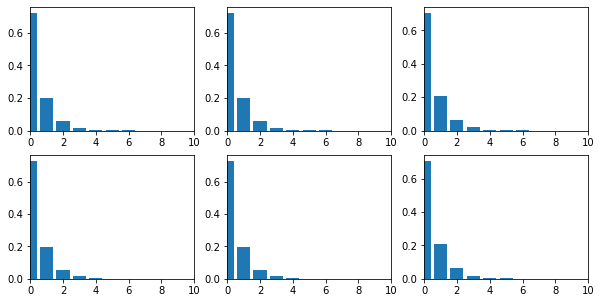

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=((10, 5)))

times = data['times']
i=0

for state, pns in data['probabilities'].items():
    col = i % 3
    row = i // 3
    axes[row][col].bar(range(len(pns[0])), pns[-1])
    i+=1
    
    axes[row][col].set_xlim(0, 10)
# ax.set_yticks([0, 25, 50, 75, 100])

# plt.savefig(IMAGEDIR + 'tweezer_Li+Yb.pdf')
plt.show()

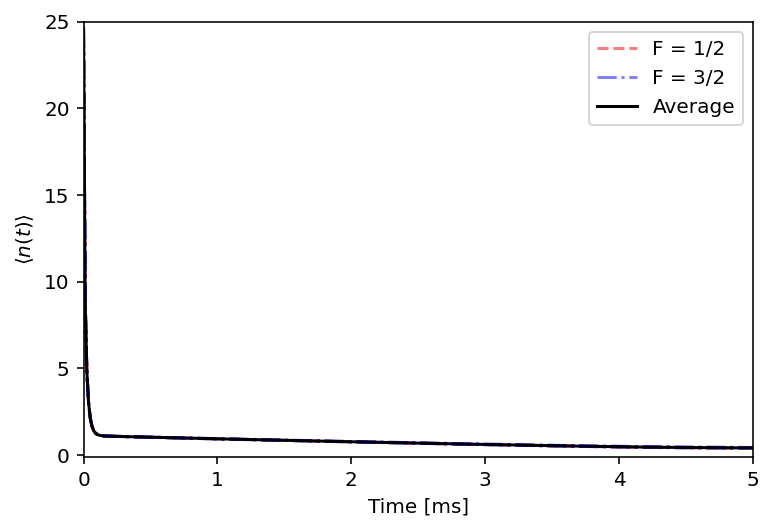

In [34]:
fig = plt.figure(dpi=72*2)
ax = plt.gca()

# States with F = 1/2
f12 = ['S12 1', 'S12 2']


for i, (state, nvt) in enumerate(data['occupation'].items()): 

    if state in f12:
        c = 'r'
        ls = '--'
        l = 'F = 1/2'
    else:
        c = 'b'
        ls = '-.'
        l = 'F = 3/2'
    times = data['times'] * 1e3
    
    
    ax.plot(times, nvt, c=c, alpha=0.5, ls=ls, label=l)
    
    
ax.plot(times, avg_nvt, c='k', ls='-', label='Average')

ax.set_ylim(-0.1, 25)
ax.set_xlim(0, 5.0)
ax.set(xlabel="Time [ms]", ylabel="$\\langle n(t) \\rangle$")

# clean legend from duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()